## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_type = application_df['APPLICATION_TYPE'].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_type_dict = application_type.to_dict()
application_types_to_replace = [i for i, j in application_type_dict.items() if j < 500]
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification = application_df['CLASSIFICATION'].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
classification_greater_than_one = classification[classification > 1]
classification_greater_than_one

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classification_dict = classification.to_dict()
classifications_to_replace = [i for i, j in classification_dict.items() if j < 2000]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df)

In [10]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(['IS_SUCCESSFUL'], axis=1)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model(Optimize Attempt 1)

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features = len(X_train_scaled[0])
nn_1 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn_1.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=number_of_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn_1.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Third hidden layer
#  YOUR CODE GOES HERE
nn_1.add(tf.keras.layers.Dense(units=20, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,291
Trainable params: 10,291
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
#  YOUR CODE GOES HERE
nn_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
#  YOUR CODE GOES HERE
fit_model_1 = nn_1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 9s 8ms/step - loss: 0.5718 - accuracy: 0.7186
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5581 - accuracy: 0.7266
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5548 - accuracy: 0.7303
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5536 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5529 - accuracy: 0.7306
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7317
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7310
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7324
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5498 - accura

In [15]:
# Evaluate the model using the test data
model_loss_1, model_accuracy_1 = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss_1}, Accuracy: {model_accuracy_1}")

268/268 - 0s - loss: 0.5684 - accuracy: 0.7257 - 347ms/epoch - 1ms/step
Loss: 0.568443238735199, Accuracy: 0.7257142663002014


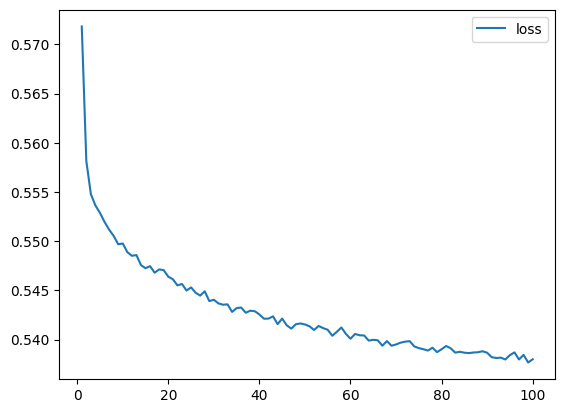

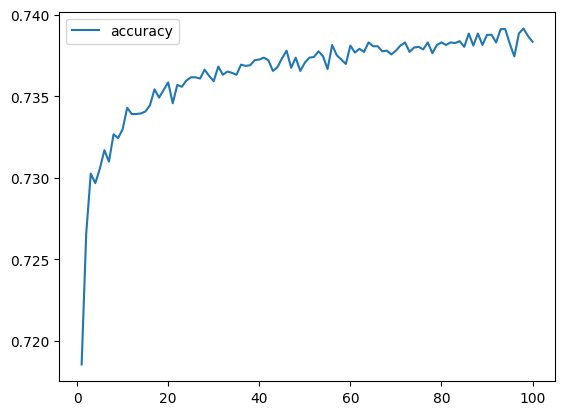

In [16]:
# visualize loss and accuracy
from matplotlib import pyplot as plt
df = pd.DataFrame(fit_model_1.history)
df.index += 1

# loss
df.plot(y='loss')

# accuracy
df.plot(y='accuracy')

plt.show()

## Compile, Train and Evaluate the Model(Optimize Attempt 2)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features = len(X_train_scaled[0])
nn_2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn_2.add(tf.keras.layers.Dense(units=150, activation='relu', input_dim=number_of_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn_2.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Third hidden layer
#  YOUR CODE GOES HERE
nn_2.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               6300      
                                                                 
 dense_5 (Dense)             (None, 50)                7550      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 14,371
Trainable params: 14,371
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
#  YOUR CODE GOES HERE
nn_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
#  YOUR CODE GOES HERE
fit_model_2 = nn_2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5793 - accuracy: 0.7193
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5605 - accuracy: 0.7252
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7293
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7303
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7306
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7309
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7314
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7321
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7310
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7326

In [20]:
# Evaluate the model using the test data
model_loss_2, model_accuracy_2 = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss_2}, Accuracy: {model_accuracy_2}")

268/268 - 0s - loss: 0.5618 - accuracy: 0.7231 - 368ms/epoch - 1ms/step
Loss: 0.5618095993995667, Accuracy: 0.7231487035751343


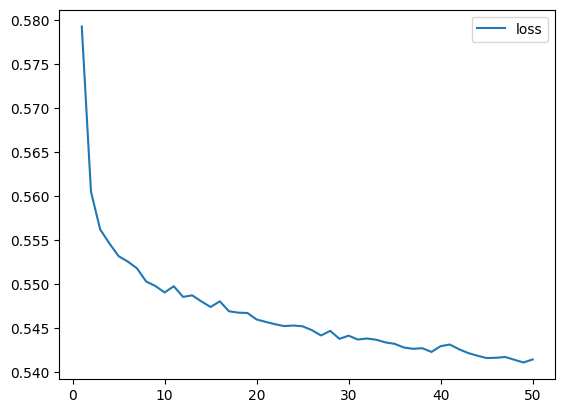

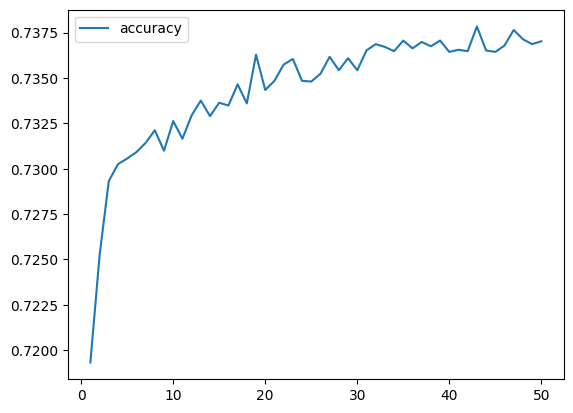

In [21]:
# visualize loss and accuracy
from matplotlib import pyplot as plt
df = pd.DataFrame(fit_model_2.history)
df.index += 1

# loss
df.plot(y='loss')

# accuracy
df.plot(y='accuracy')

plt.show()

## Compile, Train and Evaluate the Model(Optimize Attempt 3)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features = len(X_train_scaled[0])
nn_3 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn_3.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=number_of_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn_3.add(tf.keras.layers.Dense(units=70, activation='relu'))

# Third hidden layer
#  YOUR CODE GOES HERE
nn_3.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Fourth hidden layer
#  YOUR CODE GOES HERE
nn_3.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 70)                7070      
                                                                 
 dense_10 (Dense)            (None, 40)                2840      
                                                                 
 dense_11 (Dense)            (None, 10)                410       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 14,531
Trainable params: 14,531
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
#  YOUR CODE GOES HERE
nn_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Train the model
#  YOUR CODE GOES HERE
fit_model_3 = nn_3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5760 - accuracy: 0.7182
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5590 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5561 - accuracy: 0.7282
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7292
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.7320
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7335
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5500 - accuracy: 0.7328
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7332
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5491 - accura

In [25]:
# Evaluate the model using the test data
model_loss_3, model_accuracy_3 = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss_3}, Accuracy: {model_accuracy_3}")

268/268 - 0s - loss: 0.5799 - accuracy: 0.7262 - 398ms/epoch - 1ms/step
Loss: 0.5798975825309753, Accuracy: 0.7261807322502136


In [27]:
print(f"Model 1 accuracy: {model_accuracy_1}")
print(f"Model 2 accuracy: {model_accuracy_2}")
print(f"Model 3 accuracy: {model_accuracy_3}")

Model 1 accuracy: 0.7257142663002014
Model 2 accuracy: 0.7231487035751343
Model 3 accuracy: 0.7261807322502136


In [28]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn_3.save('AlphabetSoupCharity_Optimization.h5')